<a href="https://colab.research.google.com/github/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/blob/main/Analisis_del_consumo_del_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sección nueva

# **Proyecto Final - Visualizaciones en Python**

Primera Entrega




# Abstract

El Data set seleccionado de Kaggle contiene el consumo de café, el mismo fue modificado utilizando datos de los consumidores de Argentina.
En los últimos años se ha desarrollado la creación de cafés de especialidades, evidenciando de esta manera el aumento de consumo de este producto en los argentinos, se observa una evolución en los hábitos, con un crecimiento en el consumo fuera del hogar a través de cafeterías y estaciones de servicio, la expansión de formatos como las cápsulas y el auge del café de especialidad, que responde a consumidores más exigentes y consciente.

Para el análisis de este data set se han propuesto varios paradigmas, para verificar a que corresponde el aumento de consumo, analizando los lugares elegidos, las preferencias en cuanto al tipo de café, la hora más elegida en el momento de tomarlo  , se analizó si la profesión o la vocación de ellos ejercen poder en su elección , así como si las promociones están relacionadas con la elección de compra.

El café resiste: se adapta al precio, al cambio de rutinas y a las nuevas formas de consumo. Se transforma en un punto de encuentro, en una pausa necesaria o en una elección personal cargada de sentido.
A través de este análisis se busca crear conocimiento del consumidor típico de café, de manera de conocerlo y crear negocios inteligentes apuntando a las elecciones que se presentan con mayor frecuencia ,verificando cual es su principal motivo a la hora de comprar café.




**Preguntas:**

Las hipotesis parciales que vamos a responder en este trabajo atraves de la creacion de Graficos son las siguientes

1-¿Cuál es la Bebida mas elegida?

2-¿Cuál es el momento del dia elegido con mas frecuencia para el consumo de cafe?

3-¿Cual es el medio de Pago elegido?




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()
print(df.columns.tolist())
modo = df["Profesion"].mode()[0]
df["Profesion"] = df["Profesion"].fillna(modo)
print(df["Profesion"].isna().sum())
print (df.head())


['Hora del dia', 'Tipo de Tienda', 'Medio de pago', 'precio', 'Nombre del Café', 'Momento del dia', 'Dia de la semana', 'Mes', 'Dia', 'Num de Mes', 'Date', 'Profesion']
0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia  Num de Mes  \
0           Latte         Morning              Fri  Mar    5           3   
1   Hot Chocolate       Afternoon              Fri  Mar    5           3   
2   Hot Chocolate       Afternoon              Fri  Mar    5           3   
3       Americano       Afternoon              Fri  Mar    5           3   
4           Latte     

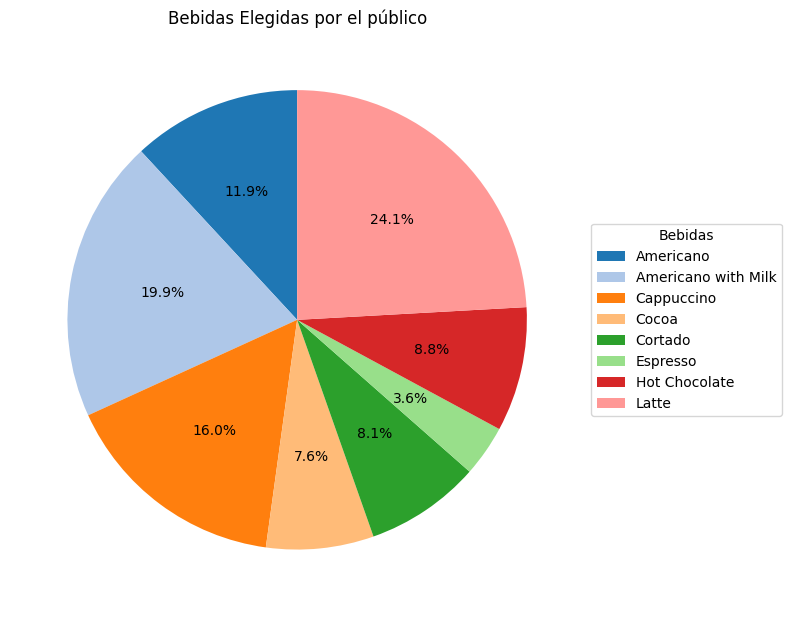

=== Resumen de gasto por bebida ===
Gasto total: 14023300.00 ARS
Bebida más consumida: Latte (3382000.00 ARS, 24.1%)
Bebida menos consumida: Espresso (505500.00 ARS, 3.6%)

Porcentaje de participación de cada bebida:
 - Americano: 1667000.00 ARS (11.9%)
 - Americano with Milk: 2795000.00 ARS (19.9%)
 - Cappuccino: 2244300.00 ARS (16.0%)
 - Cocoa: 1061500.00 ARS (7.6%)
 - Cortado: 1138500.00 ARS (8.1%)
 - Espresso: 505500.00 ARS (3.6%)
 - Hot Chocolate: 1229500.00 ARS (8.8%)
 - Latte: 3382000.00 ARS (24.1%)


In [ ]:

#GRAFICO UNIVARIADO TIPO DE BEBIDA ELEGIDA

import matplotlib.pyplot as plt

gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()

plt.figure(figsize=(8,8))
colors = plt.cm.tab20.colors  # paleta de colores

# Graficar pie chart
wedges, texts, autotexts = plt.pie(
    gasto_por_tienda,
    labels=None,  # quitamos las etiquetas directas
    autopct="%1.1f%%",
    startangle=90,
    colors=colors
)

# Añadir leyenda con nombres de bebidas
plt.legend(
    wedges,
    gasto_por_tienda.index,
    title="Bebidas",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Bebidas Elegidas por el público")
plt.tight_layout()
plt.show()

import pandas as pd

# Calcular gasto total por bebida
gasto_por_tienda = df.groupby("Nombre del Café")["precio"].sum()
gasto_total = gasto_por_tienda.sum()

# Bebida más y menos consumida
max_bebida = gasto_por_tienda.idxmax()
min_bebida = gasto_por_tienda.idxmin()
max_valor = gasto_por_tienda.max()
min_valor = gasto_por_tienda.min()

print("=== Resumen de gasto por bebida ===")
print(f"Gasto total: {gasto_total:.2f} ARS")
print(f"Bebida más consumida: {max_bebida} ({max_valor:.2f} ARS, {100*max_valor/gasto_total:.1f}%)")
print(f"Bebida menos consumida: {min_bebida} ({min_valor:.2f} ARS, {100*min_valor/gasto_total:.1f}%)")
print("\nPorcentaje de participación de cada bebida:")
for bebida, valor in gasto_por_tienda.items():
    porcentaje = 100 * valor / gasto_total
    print(f" - {bebida}: {valor:.2f} ARS ({porcentaje:.1f}%)")



=== Resumen de gasto por hora ===
Hora con mayor gasto: 10 hs (1222700.00 ARS)
Hora con menor gasto: 6 hs (14700.00 ARS)
Gasto promedio por hora: 824900.00 ARS


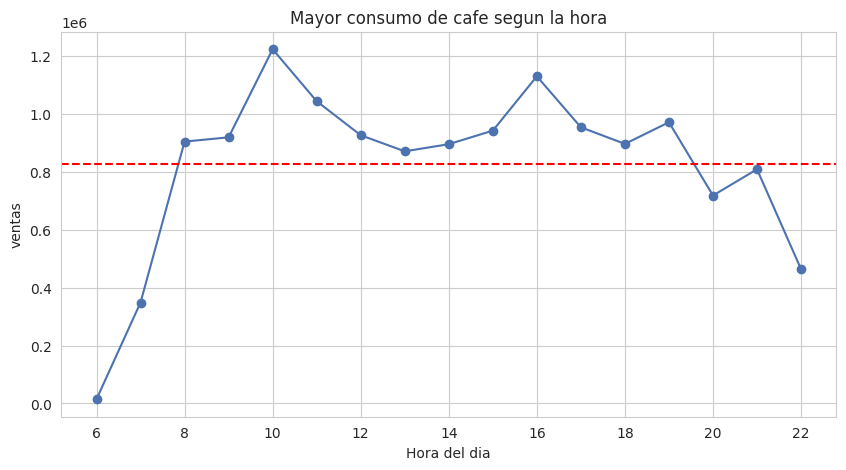

In [ ]:
#GRAFICO UNIVARIADO TEMPORAL  DIA Y HORA MAS ELEGIDOS

import plotly.express as px

gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
sns.set_style("whitegrid")
sns.set_palette("deep")

plt.figure(figsize=(10,5))
plt.plot(gasto_diario.index, gasto_diario.values, marker="o", label="Compra de cafe")
plt.axhline(media_diaria, color="red", linestyle="--", label=f"Media: {media_diaria:.2f} ARS")
plt.title("Mayor consumo de cafe segun la hora")
plt.xlabel("Hora del dia")
plt.ylabel("ventas")
plt.grid(True)

import pandas as pd

# Agrupar gasto por hora
gasto_diario = df.groupby("Hora del dia")["precio"].sum()
media_diaria = gasto_diario.mean()
hora_max = gasto_diario.idxmax()
hora_min = gasto_diario.idxmin()
max_valor = gasto_diario.max()
min_valor = gasto_diario.min()
gasto_total = gasto_diario.sum()

# Mostrar resumen
print("=== Resumen de gasto por hora ===")

print(f"Hora con mayor gasto: {hora_max} hs ({max_valor:.2f} ARS)")
print(f"Hora con menor gasto: {hora_min} hs ({min_valor:.2f} ARS)")
print(f"Gasto promedio por hora: {media_diaria:.2f} ARS")






In [ ]:
#GRAFICO MULTIVARIADO

import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Leer un archivo CSV
url = "https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/refs/heads/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv"
df = pd.read_csv(url, sep=";")

df.columns = df.columns.str.strip()


# Agrupar frecuencia por Día, Hora y Momento
tabla = df.groupby(["Dia de la semana", "Hora del dia", "Momento del dia"]).size().reset_index(name="Frecuencia")

# Crear heatmap interactivo
fig = px.density_heatmap(
    tabla,
    x="Hora del dia",
    y="Dia de la semana",
    z="Frecuencia",
    color_continuous_scale="YlOrBr",
    facet_col="Momento del dia",  # divide por mañana, tarde, noche
    title="Frecuencia de compras por Hora, Día de la semana y Momento del día")
fig.show()
hora_max = tabla.loc[tabla["Frecuencia"].idxmax()]
print("Mayor concurrencia:", hora_max.to_dict())
dia_max = tabla.groupby("Dia de la semana")["Frecuencia"].sum().idxmax()
print("Dia con mayor concurrencia:", dia_max)
hora_min = tabla.loc[tabla["Frecuencia"].idxmin()]
print("Menor concurrencia:", hora_min.to_dict())
momento_max = tabla.groupby("Momento del dia")["Frecuencia"].sum().idxmax()
print("Momento con mayor concurrencia:", momento_max)







Mayor concurrencia: {'Dia de la semana': 'Tue', 'Hora del dia': 11, 'Momento del dia': 'Morning', 'Frecuencia': 56}
Dia con mayor concurrencia: Tue
Menor concurrencia: {'Dia de la semana': 'Mon', 'Hora del dia': 6, 'Momento del dia': 'Morning', 'Frecuencia': 2}
Momento con mayor concurrencia: Afternoon


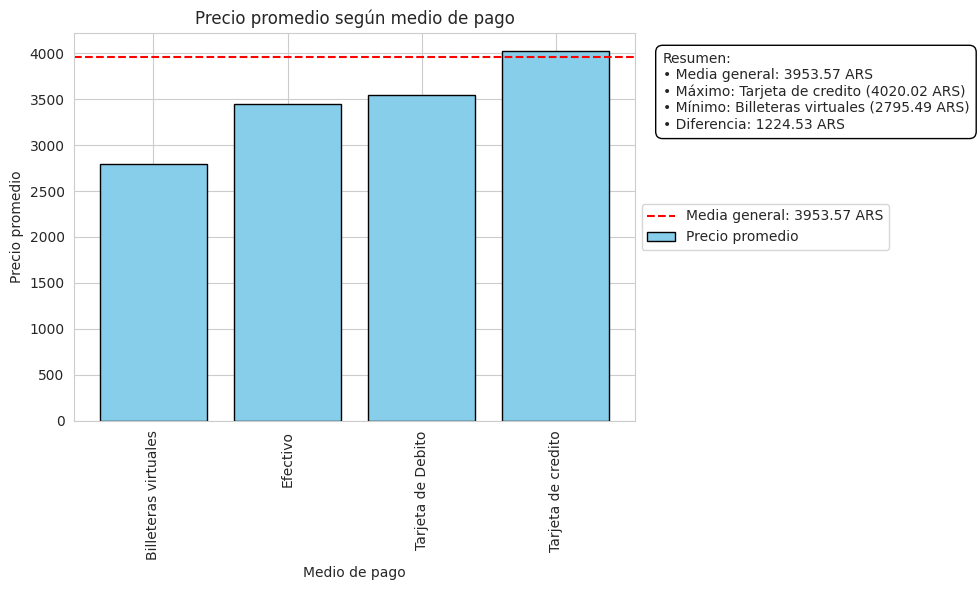

In [ ]:
#3- PREGUNTA ANALISIS DE PRECIO ATRAVES DE UN GRAFICO BIVARIADO

import pandas as pd
import matplotlib.pyplot as plt

# Calcular promedios
promedios = df.groupby("Medio de pago")["precio"].mean()
media_general = df["precio"].mean()

# Gráfico de barras con línea de la media general
plt.figure(figsize=(10,6))
bars = plt.bar(promedios.index, promedios.values, color="skyblue", edgecolor="black", label="Precio promedio")
plt.axhline(media_general, color="red", linestyle="--", label=f"Media general: {media_general:.2f} ARS")
plt.title("Precio promedio según medio de pago")
plt.xlabel("Medio de pago")
plt.ylabel("Precio promedio")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Resumen automático
medio_max = promedios.idxmax()
medio_min = promedios.idxmin()
precio_max = promedios.max()
precio_min = promedios.min()

resumen = (
    f"Resumen:\n"
    f"• Media general: {media_general:.2f} ARS\n"
    f"• Máximo: {medio_max} ({precio_max:.2f} ARS)\n"
    f"• Mínimo: {medio_min} ({precio_min:.2f} ARS)\n"
    f"• Diferencia: {precio_max - precio_min:.2f} ARS"
)

# Añadir texto al gráfico (en un recuadro)
plt.gca().text(
    1.05, 0.95, resumen,
    transform=plt.gca().transAxes,
    fontsize=10,
    va="top", ha="left",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()


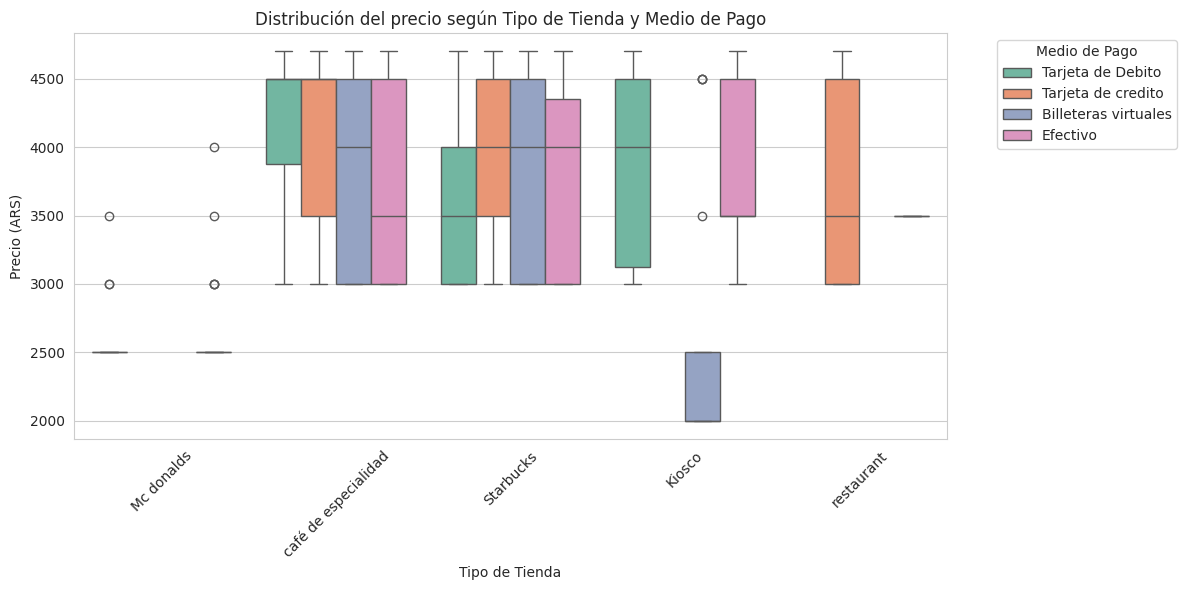

Precio máximo: 4700 ARS
Precio mínimo: 2000 ARS
Tienda más elegida: café de especialidad (2330 compras)
Tienda menos elegida: restaurant (33 compras)
Precio medio: 3953.57 ARS
Tienda más visitada (media): café de especialidad
=== Outliers del boxplot multivariado ===
   Tipo de Tienda         Medio de pago  Precio outlier
0          Kiosco  Billeteras virtuales            4500
1          Kiosco  Billeteras virtuales            4500
2          Kiosco  Billeteras virtuales            3500
3          Kiosco  Billeteras virtuales            4500
4      Mc donalds              Efectivo            4000
5      Mc donalds              Efectivo            3000
6      Mc donalds              Efectivo            3500
7      Mc donalds              Efectivo            3000
8      Mc donalds              Efectivo            3000
9      Mc donalds     Tarjeta de Debito            3500
10     Mc donalds     Tarjeta de Debito            3000
11     Mc donalds     Tarjeta de Debito            3000
=== 

In [ ]:

#GRAFICO MULTIVARIADO

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(
    x="Tipo de Tienda",
    y="precio",
    hue="Medio de pago",
    data=df,
    palette="Set2")
plt.title("Distribución del precio según Tipo de Tienda y Medio de Pago")
plt.xlabel("Tipo de Tienda")
plt.ylabel("Precio (ARS)")
plt.xticks(rotation=45)
plt.legend(title="Medio de Pago", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Agrupar por Tipo de Tienda y Medio de pago
grupos = df.groupby(["Tipo de Tienda", "Medio de pago"])

# Valor máximo y mínimo del precio
precio_max = df["precio"].max()
precio_min = df["precio"].min()
print(f"Precio máximo: {precio_max} ARS")
print(f"Precio mínimo: {precio_min} ARS")

# Tienda más y menos elegida

frecuencia_tienda = df["Tipo de Tienda"].value_counts()

tienda_mas = frecuencia_tienda.idxmax()
tienda_menos = frecuencia_tienda.idxmin()
cant_mas = frecuencia_tienda.max()
cant_menos = frecuencia_tienda.min()

print(f"Tienda más elegida: {tienda_mas} ({cant_mas} compras)")
print(f"Tienda menos elegida: {tienda_menos} ({cant_menos} compras)")

# Precio medio
precio_medio = df["precio"].mean()

# Tienda más visitada (modo)
tienda_media = df["Tipo de Tienda"].mode()[0]

print(f"Precio medio: {precio_medio:.2f} ARS")
print(f"Tienda más visitada (media): {tienda_media}")

import pandas as pd

# Lista para almacenar outliers
outliers = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        for val in valores_fuera["precio"]:
            outliers.append({
                "Tipo de Tienda": tienda,
                "Medio de pago": medio,
                "Precio outlier": val
            })

# Convertir a DataFrame
outliers_df = pd.DataFrame(outliers)

print("=== Outliers del boxplot multivariado ===")
print(outliers_df)
import pandas as pd

# Lista para almacenar los outliers extremos
outliers_extremos = []

# Agrupar por Tipo de Tienda y Medio de pago
for (tienda, medio), datos in df.groupby(["Tipo de Tienda", "Medio de pago"]):
    Q1 = datos["precio"].quantile(0.25)
    Q3 = datos["precio"].quantile(0.75)
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5*IQR
    lim_sup = Q3 + 1.5*IQR

    # Filtrar outliers
    valores_fuera = datos[(datos["precio"] < lim_inf) | (datos["precio"] > lim_sup)]

    if not valores_fuera.empty:
        outliers_extremos.append({
            "Tipo de Tienda": tienda,
            "Medio de pago": medio,
            "Precio mínimo outlier": valores_fuera["precio"].min(),
            "Precio máximo outlier": valores_fuera["precio"].max()
        })

# Convertir a DataFrame
outliers_extremos_df = pd.DataFrame(outliers_extremos)

print("=== Valores más alejados (outliers extremos) ===")
print(outliers_extremos_df)





In [40]:
import pandas as pd
import random

# Cargar el dataset original desde la URL
archivo = 'https://raw.githubusercontent.com/estemartinez87-cell/ProyectoConsumodeCafeI-MartinezEstela/main/DATA%20SET%20ANALISIS%20CONSUMO%20DE%20CAFE.csv'
df = pd.read_csv(archivo, sep=';')  # Asegurarse de usar punto y coma como separador

# Definir opciones
climas = ['calor', 'nublado', 'frío', 'lluvia', 'templado']
barrios = ['Palermo', 'Recoleta', 'Belgrano', 'Caballito', 'Villa Urquiza',
    'San Telmo', 'Almagro', 'Núñez', 'Boedo', 'Retiro', 'Villa Crespo',
    'Constitución', 'Flores', 'Villa Lugano', 'Chacarita', 'Barracas']

# Agregar columnas nuevas
df['Cantidad'] = [random.randint(1, 5) for _ in range(len(df))]
df['Clima'] = [random.choice(climas) for _ in range(len(df))]
df['Ubicación'] = [random.choice(barrios) for _ in range(len(df))]
df['Ventas'] = df['precio'] * df['Cantidad']

modo = df["Profesion "].mode()[0]
df["Profesion "] = df["Profesion "].fillna(modo)
print(df["Profesion "].isna().sum())
print (df.head())



0
   Hora del dia        Tipo de Tienda         Medio de pago  precio  \
0            10            Mc donalds     Tarjeta de Debito    3500   
1            12  café de especialidad    Tarjeta de credito    4500   
2            12             Starbucks    Tarjeta de credito    4500   
3            13                Kiosco  Billeteras virtuales    2000   
4            13             Starbucks    Tarjeta de credito    4500   

  Nombre del Café Momento del dia Dia de la semana  Mes  Dia   Num de Mes  \
0           Latte         Morning              Fri  Mar     5           3   
1   Hot Chocolate       Afternoon              Fri  Mar     5           3   
2   Hot Chocolate       Afternoon              Fri  Mar     5           3   
3       Americano       Afternoon              Fri  Mar     5           3   
4           Latte       Afternoon              Fri  Mar     5           3   

       Date          Profesion   Cantidad     Clima      Ubicación  Ventas  
0  1/3/2024  trabajo de oficina

In [45]:
VarianceThreshold

import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Solo columnas numéricas
X = df.select_dtypes(include=['int64', 'float64'])

# Aplicar Variance Threshold
selector = VarianceThreshold(threshold=0.1)
X_reduced = selector.fit_transform(X)

# Recuperar nombres de columnas
selected_columns = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_reduced, columns=selected_columns)

print("Columnas seleccionadas VarianceThreshold:")
print(selected_columns)

Columnas seleccionadas VarianceThreshold:
Index(['Hora del dia', 'precio', 'Dia ', 'Num de Mes', 'Cantidad', 'Ventas'], dtype='object')


In [46]:
SelectKBest

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

X = df.select_dtypes(include=['int64', 'float64'])
y = df['precio']

selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
X_new = pd.DataFrame(X_new, columns=selected_columns)

print("Columnas seleccionadas SelectKBest:")
print(selected_columns)

Columnas seleccionadas SelectKBest:
Index(['Hora del dia', 'precio', 'Ventas'], dtype='object')


In [48]:
RFE

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.select_dtypes(include=['int64', 'float64'])
y = df['precio']

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

selected_columns = X.columns[rfe.support_]
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Columnas seleccionadas RFE:")
print(selected_columns)
print("\nRanking completo:")
print(ranking)


Columnas seleccionadas RFE:
Index(['Hora del dia', 'precio', 'Dia '], dtype='object')

Ranking completo:
        Feature  Ranking
0  Hora del dia        1
1        precio        1
2          Dia         1
4      Cantidad        2
3    Num de Mes        3
5        Ventas        4


In [51]:
from sklearn.feature_selection import VarianceThreshold

# Solo variables numéricas
X = df[['Cantidad']].copy()  # ventas es numérica
# Convertir categorías si quieres incluirlas
X = pd.get_dummies(df[['Cantidad', 'Ubicación', 'Tipo de Tienda']], drop_first=True)

selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

selected_columns = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_columns)


Variables seleccionadas: Index(['Cantidad', 'Ubicación_Barracas', 'Ubicación_Belgrano',
       'Ubicación_Boedo', 'Ubicación_Caballito', 'Ubicación_Chacarita',
       'Ubicación_Constitución', 'Ubicación_Flores', 'Ubicación_Núñez',
       'Ubicación_Palermo', 'Ubicación_Recoleta', 'Ubicación_Retiro',
       'Ubicación_San Telmo', 'Ubicación_Villa Crespo',
       'Ubicación_Villa Lugano', 'Ubicación_Villa Urquiza',
       'Tipo de Tienda_Mc donalds', 'Tipo de Tienda_Starbucks',
       'Tipo de Tienda_café de especialidad'],
      dtype='object')


In [52]:
from sklearn.feature_selection import SelectKBest, f_regression

X = pd.get_dummies(df[['Cantidad', 'Ubicación', 'Tipo de Tienda']], drop_first=True)
y = df['precio']  # o 'Ventas' si querés predecir ventas

selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("Variables seleccionadas:", selected_columns)


Variables seleccionadas: Index(['Tipo de Tienda_Mc donalds', 'Tipo de Tienda_Starbucks',
       'Tipo de Tienda_café de especialidad'],
      dtype='object')


In [53]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

X = pd.get_dummies(df[['Cantidad', 'Ubicación', 'Tipo de Tienda']], drop_first=True)
y = df['precio']

model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

selected_columns = X.columns[rfe.support_]
print("Variables seleccionadas:", selected_columns)


Variables seleccionadas: Index(['Tipo de Tienda_Starbucks', 'Tipo de Tienda_café de especialidad',
       'Tipo de Tienda_restaurant'],
      dtype='object')


In [54]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# --- Variables ---
features = ['Cantidad', 'Ubicación', 'Tipo de Tienda']  # reemplaza 'Cantidad' por 'Ventas' si tu columna se llama así
target = 'precio'

# --- Selección de predictores y objetivo ---
X = df[features].copy()
y = df[target].copy()

# --- Convertimos categóricas a numéricas ---
X = pd.get_dummies(X, drop_first=True)

# --- Aplicamos SelectKBest ---
selector = SelectKBest(score_func=f_regression, k=3)  # selecciona las 3 mejores variables
X_new = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("✅ Variables seleccionadas con SelectKBest:")
print(selected_columns)


✅ Variables seleccionadas con SelectKBest:
Index(['Tipo de Tienda_Mc donalds', 'Tipo de Tienda_Starbucks',
       'Tipo de Tienda_café de especialidad'],
      dtype='object')


In [55]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# --- Modelo base ---
model = RandomForestRegressor(n_estimators=100, random_state=42)

# --- RFE para seleccionar 3 variables ---
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

selected_columns_rfe = X.columns[rfe.support_]
print("✅ Variables seleccionadas con RFE:")
print(selected_columns_rfe)



✅ Variables seleccionadas con RFE:
Index(['Tipo de Tienda_Starbucks', 'Tipo de Tienda_café de especialidad',
       'Tipo de Tienda_restaurant'],
      dtype='object')


In [56]:
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print(ranking)


                                Feature  Ranking
18  Tipo de Tienda_café de especialidad        1
19            Tipo de Tienda_restaurant        1
17             Tipo de Tienda_Starbucks        1
0                              Cantidad        2
11                     Ubicación_Retiro        3
15              Ubicación_Villa Urquiza        4
2                    Ubicación_Belgrano        5
16            Tipo de Tienda_Mc donalds        6
12                  Ubicación_San Telmo        7
9                     Ubicación_Palermo        8
13               Ubicación_Villa Crespo        9
4                   Ubicación_Caballito       10
10                   Ubicación_Recoleta       11
1                    Ubicación_Barracas       12
5                   Ubicación_Chacarita       13
14               Ubicación_Villa Lugano       14
8                       Ubicación_Núñez       15
3                       Ubicación_Boedo       16
7                      Ubicación_Flores       17
6                Ubi

In [57]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# --- Variables a usar ---
features = ['Cantidad', 'Ubicación', 'Tipo de Tienda']  # reemplaza 'Cantidad' por 'Ventas' si tu columna se llama así
target = 'precio'  # variable a predecir

# --- Selección de predictores y objetivo ---
X = df[features].copy()
y = df[target].copy()

# --- Convertimos categóricas a numéricas (One-Hot Encoding) ---
X = pd.get_dummies(X, drop_first=True)

# --- Modelo base ---
model = RandomForestRegressor(n_estimators=100, random_state=42)

# --- RFE para seleccionar 3 variables ---
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# --- Columnas seleccionadas ---
selected_columns_rfe = X.columns[rfe.support_]
print("✅ Variables seleccionadas con RFE:")
print(selected_columns_rfe)

# --- Ranking completo de todas las variables ---
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\n📊 Ranking completo de variables:")
print(ranking)


✅ Variables seleccionadas con RFE:
Index(['Tipo de Tienda_Starbucks', 'Tipo de Tienda_café de especialidad',
       'Tipo de Tienda_restaurant'],
      dtype='object')

📊 Ranking completo de variables:
                                Feature  Ranking
18  Tipo de Tienda_café de especialidad        1
19            Tipo de Tienda_restaurant        1
17             Tipo de Tienda_Starbucks        1
0                              Cantidad        2
11                     Ubicación_Retiro        3
15              Ubicación_Villa Urquiza        4
2                    Ubicación_Belgrano        5
16            Tipo de Tienda_Mc donalds        6
12                  Ubicación_San Telmo        7
9                     Ubicación_Palermo        8
13               Ubicación_Villa Crespo        9
4                   Ubicación_Caballito       10
10                   Ubicación_Recoleta       11
1                    Ubicación_Barracas       12
5                   Ubicación_Chacarita       13
14            

In [58]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# --- Variables predictivas ---
features = ['Cantidad', 'Tipo de Tienda', 'Ubicación', 'Nombre del Café']  # 'Cantidad' = Ventas
target = 'precio'  # variable objetivo

# --- Selección de predictores y objetivo ---
X = df[features].copy()
y = df[target].copy()

# --- Convertimos categóricas en variables numéricas (One-Hot Encoding) ---
X = pd.get_dummies(X, drop_first=True)

# --- Modelo base ---
model = RandomForestRegressor(n_estimators=100, random_state=42)

# --- RFE para seleccionar 5 variables más importantes ---
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# --- Columnas seleccionadas ---
selected_columns_rfe = X.columns[rfe.support_]
print("✅ Variables seleccionadas con RFE:")
print(selected_columns_rfe)

# --- Ranking completo ---
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\n📊 Ranking completo de variables:")
print(ranking)


✅ Variables seleccionadas con RFE:
Index(['Nombre del Café_Americano with Milk', 'Nombre del Café_Cappuccino',
       'Nombre del Café_Cocoa', 'Nombre del Café_Hot Chocolate',
       'Nombre del Café_Latte'],
      dtype='object')

📊 Ranking completo de variables:
                                Feature  Ranking
25        Nombre del Café_Hot Chocolate        1
20  Nombre del Café_Americano with Milk        1
22                Nombre del Café_Cocoa        1
26                Nombre del Café_Latte        1
21           Nombre del Café_Cappuccino        1
23              Nombre del Café_Cortado        2
24             Nombre del Café_Espresso        3
1             Tipo de Tienda_Mc donalds        4
0                              Cantidad        5
2              Tipo de Tienda_Starbucks        6
4             Tipo de Tienda_restaurant        7
3   Tipo de Tienda_café de especialidad        8
15                     Ubicación_Retiro        9
19              Ubicación_Villa Urquiza       10


✅ Variables seleccionadas con RFE:
Index(['Nombre del Café_Americano with Milk', 'Nombre del Café_Cappuccino',
       'Nombre del Café_Cocoa', 'Nombre del Café_Hot Chocolate',
       'Nombre del Café_Latte'],
      dtype='object')

📊 Ranking completo de variables:
                                Feature  Ranking
25        Nombre del Café_Hot Chocolate        1
20  Nombre del Café_Americano with Milk        1
22                Nombre del Café_Cocoa        1
26                Nombre del Café_Latte        1
21           Nombre del Café_Cappuccino        1
23              Nombre del Café_Cortado        2
24             Nombre del Café_Espresso        3
1             Tipo de Tienda_Mc donalds        4
0                              Cantidad        5
2              Tipo de Tienda_Starbucks        6
4             Tipo de Tienda_restaurant        7
3   Tipo de Tienda_café de especialidad        8
15                     Ubicación_Retiro        9
19              Ubicación_Villa Urquiza       10


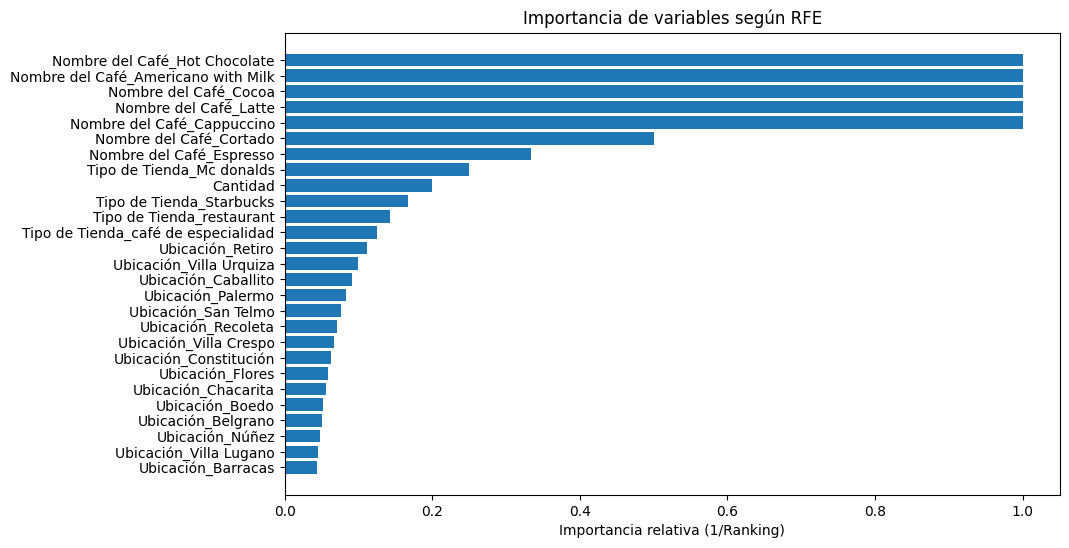

In [59]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --- Variables predictivas ---
features = ['Cantidad', 'Tipo de Tienda', 'Ubicación', 'Nombre del Café']  # 'Cantidad' = Ventas
target = 'precio'

# --- Selección de predictores y objetivo ---
X = df[features].copy()
y = df[target].copy()

# --- Convertimos categóricas en variables numéricas ---
X = pd.get_dummies(X, drop_first=True)

# --- Modelo base ---
model = RandomForestRegressor(n_estimators=100, random_state=42)

# --- RFE ---
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# --- Columnas seleccionadas ---
selected_columns_rfe = X.columns[rfe.support_]
print("✅ Variables seleccionadas con RFE:")
print(selected_columns_rfe)

# --- Ranking completo ---
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\n📊 Ranking completo de variables:")
print(ranking)

# --- Gráfico de importancia ---
plt.figure(figsize=(10,6))
plt.barh(ranking['Feature'], 1/ranking['Ranking'])  # 1/Ranking para que Ranking=1 sea más alto
plt.xlabel('Importancia relativa (1/Ranking)')
plt.title('Importancia de variables según RFE')
plt.gca().invert_yaxis()
plt.show()


In [60]:
import pandas as pd

# Supongamos que tus columnas numéricas son 'Cantidad' (Ventas) y 'precio'
numeric_cols = ['Cantidad', 'precio']

# Creamos una copia del dataset
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("✅ Dataset limpio de outliers. Nuevo tamaño:", df_clean.shape)


✅ Dataset limpio de outliers. Nuevo tamaño: (3547, 16)


✅ Variables seleccionadas con RFE (sin outliers):
Index(['Nombre del Café_Americano with Milk', 'Nombre del Café_Cappuccino',
       'Nombre del Café_Cocoa', 'Nombre del Café_Hot Chocolate',
       'Nombre del Café_Latte'],
      dtype='object')


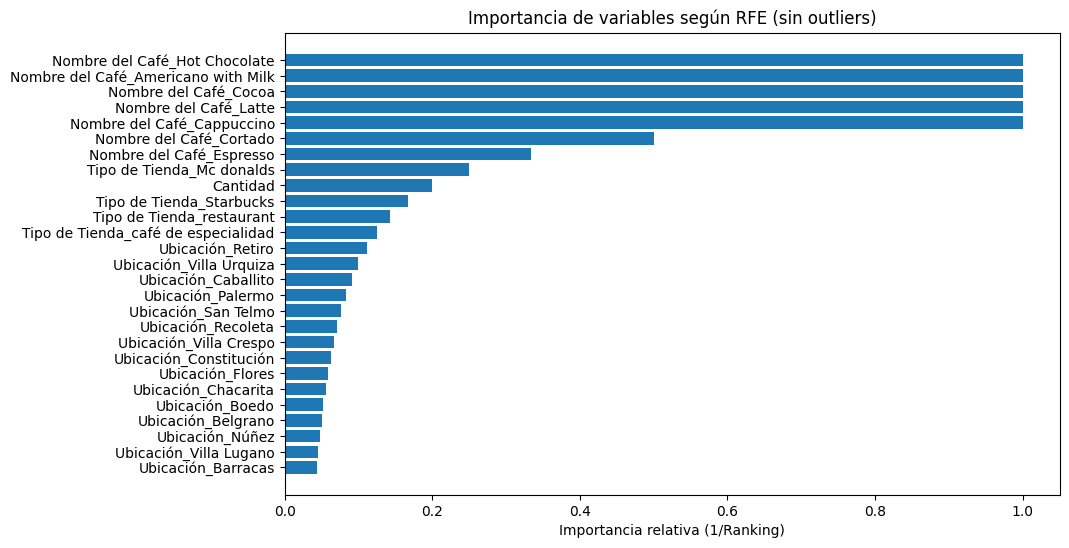

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

features = ['Cantidad', 'Tipo de Tienda', 'Ubicación', 'Nombre del Café']
target = 'precio'

X = df_clean[features].copy()
y = df_clean[target].copy()

# One-Hot Encoding para variables categóricas
X = pd.get_dummies(X, drop_first=True)

# Modelo base
model = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Columnas seleccionadas
selected_columns_rfe = X.columns[rfe.support_]
print("✅ Variables seleccionadas con RFE (sin outliers):")
print(selected_columns_rfe)

# Ranking completo
ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(ranking['Feature'], 1/ranking['Ranking'])
plt.xlabel('Importancia relativa (1/Ranking)')
plt.title('Importancia de variables según RFE (sin outliers)')
plt.gca().invert_yaxis()
plt.show()


✅ Dataset limpio de outliers. Nuevo tamaño: (3547, 16)

✅ Variables seleccionadas con RFE:
Index(['Nombre del Café_Americano with Milk', 'Nombre del Café_Cappuccino',
       'Nombre del Café_Cocoa', 'Nombre del Café_Hot Chocolate',
       'Nombre del Café_Latte'],
      dtype='object')

📊 Ranking completo de variables:
                                Feature  Ranking
25        Nombre del Café_Hot Chocolate        1
20  Nombre del Café_Americano with Milk        1
22                Nombre del Café_Cocoa        1
26                Nombre del Café_Latte        1
21           Nombre del Café_Cappuccino        1
23              Nombre del Café_Cortado        2
24             Nombre del Café_Espresso        3
1             Tipo de Tienda_Mc donalds        4
0                              Cantidad        5
2              Tipo de Tienda_Starbucks        6
4             Tipo de Tienda_restaurant        7
3   Tipo de Tienda_café de especialidad        8
15                     Ubicación_Retiro   

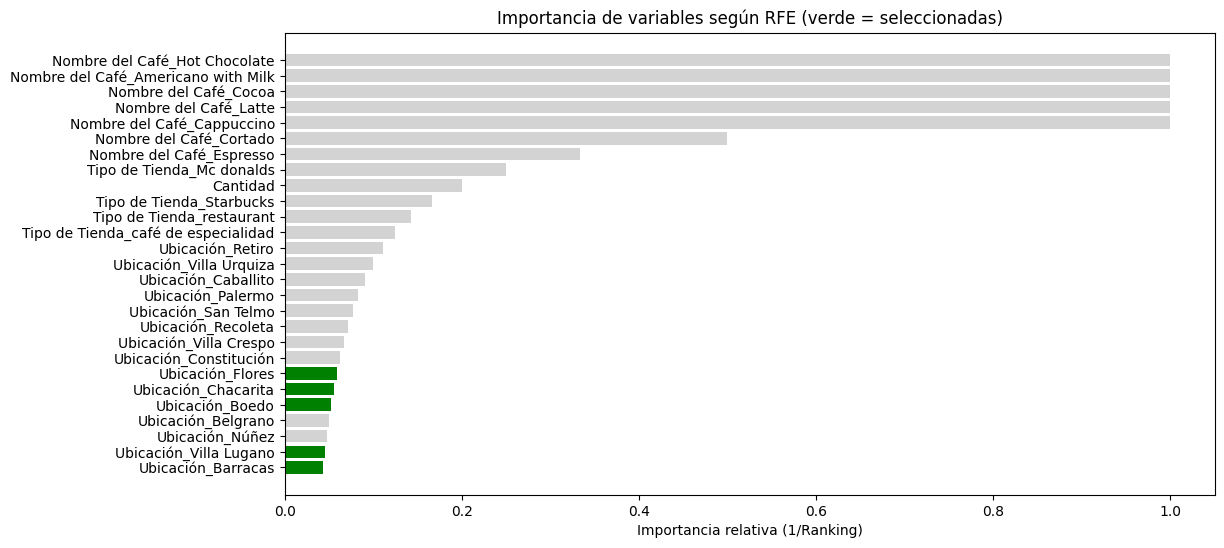

In [62]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# --- 1️⃣ Eliminar outliers ---
numeric_cols = ['Cantidad', 'precio']  # columnas numéricas
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("✅ Dataset limpio de outliers. Nuevo tamaño:", df_clean.shape)

# --- 2️⃣ Definir variables predictoras y objetivo ---
features = ['Cantidad', 'Tipo de Tienda', 'Ubicación', 'Nombre del Café']
target = 'precio'

X = df_clean[features].copy()
y = df_clean[target].copy()

# --- One-Hot Encoding ---
X = pd.get_dummies(X, drop_first=True)

# --- 3️⃣ Modelo base y RFE ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# --- 4️⃣ Variables seleccionadas y ranking ---
selected_columns = X.columns[rfe.support_]
print("\n✅ Variables seleccionadas con RFE:")
print(selected_columns)

ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\n📊 Ranking completo de variables:")
print(ranking)

# --- 5️⃣ Gráfico de importancia ---
plt.figure(figsize=(12,6))
colors = ['green' if rfe.support_[i] else 'lightgray' for i in range(len(X.columns))]
plt.barh(ranking['Feature'], 1/ranking['Ranking'], color=colors)
plt.xlabel('Importancia relativa (1/Ranking)')
plt.title('Importancia de variables según RFE (verde = seleccionadas)')
plt.gca().invert_yaxis()
plt.show()


✅ Dataset limpio de outliers. Nuevo tamaño: (3547, 16)

✅ Variables seleccionadas con RFE para predecir 'Cantidad':
Index(['precio', 'Tipo de Tienda_Starbucks',
       'Tipo de Tienda_café de especialidad', 'Ubicación_Caballito',
       'Ubicación_Palermo'],
      dtype='object')

📊 Ranking completo de variables:
                                Feature  Ranking
0                                precio        1
2              Tipo de Tienda_Starbucks        1
3   Tipo de Tienda_café de especialidad        1
8                   Ubicación_Caballito        1
13                    Ubicación_Palermo        1
23              Nombre del Café_Cortado        2
11                     Ubicación_Flores        3
26                Nombre del Café_Latte        4
22                Nombre del Café_Cocoa        5
12                      Ubicación_Núñez        6
9                   Ubicación_Chacarita        7
14                   Ubicación_Recoleta        8
21           Nombre del Café_Cappuccino        9

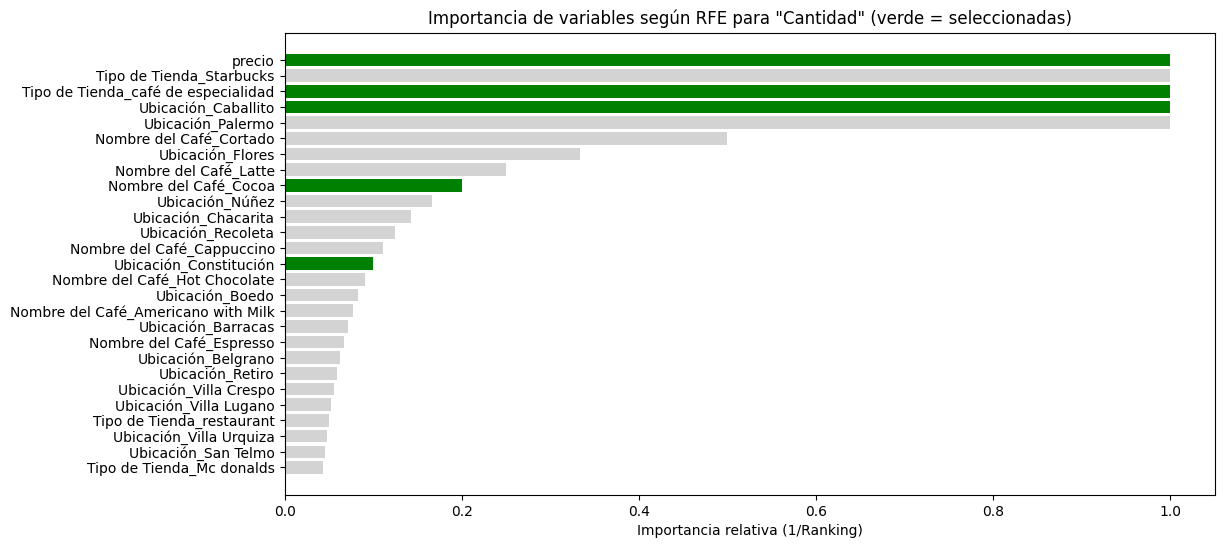

In [63]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Configuración flexible
# ---------------------------

# Variable objetivo (a predecir)
target = 'Cantidad'  # por ejemplo: 'Cantidad' o 'precio'

# Variables predictoras
features = ['Tipo de Tienda', 'Ubicación', 'Nombre del Café', 'precio']  # ajusta según lo que quieras usar

# Número de variables a seleccionar con RFE
n_features_to_select = 5

# Columnas numéricas para detectar outliers (opcional)
numeric_cols = ['Cantidad', 'precio']

# ---------------------------
# 2️⃣ Eliminar outliers usando IQR
# ---------------------------
df_clean = df.copy()
for col in numeric_cols:
    if col in df_clean.columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("✅ Dataset limpio de outliers. Nuevo tamaño:", df_clean.shape)

# ---------------------------
# 3️⃣ Preparar datos para RFE
# ---------------------------
X = df_clean[features].copy()
y = df_clean[target].copy()

# Convertir categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# ---------------------------
# 4️⃣ Modelo base y RFE
# ---------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

# ---------------------------
# 5️⃣ Resultados
# ---------------------------
selected_columns = X.columns[rfe.support_]
print(f"\n✅ Variables seleccionadas con RFE para predecir '{target}':")
print(selected_columns)

ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\n📊 Ranking completo de variables:")
print(ranking)

# ---------------------------
# 6️⃣ Gráfico de importancia
# ---------------------------
plt.figure(figsize=(12,6))
colors = ['green' if rfe.support_[i] else 'lightgray' for i in range(len(X.columns))]
plt.barh(ranking['Feature'], 1/ranking['Ranking'], color=colors)
plt.xlabel('Importancia relativa (1/Ranking)')
plt.title(f'Importancia de variables según RFE para "{target}" (verde = seleccionadas)')
plt.gca().invert_yaxis()
plt.show()


✅ Dataset limpio de outliers. Nuevo tamaño: (3547, 16)

✅ Variables seleccionadas con RFE para 'Cantidad':
Index(['precio', 'Tipo de Tienda_Starbucks',
       'Tipo de Tienda_café de especialidad', 'Ubicación_Caballito',
       'Ubicación_Palermo'],
      dtype='object')

📊 Métricas del modelo (Regresión):
MAE: 1.24
MSE: 2.07
RMSE: 1.44
R²: -0.01


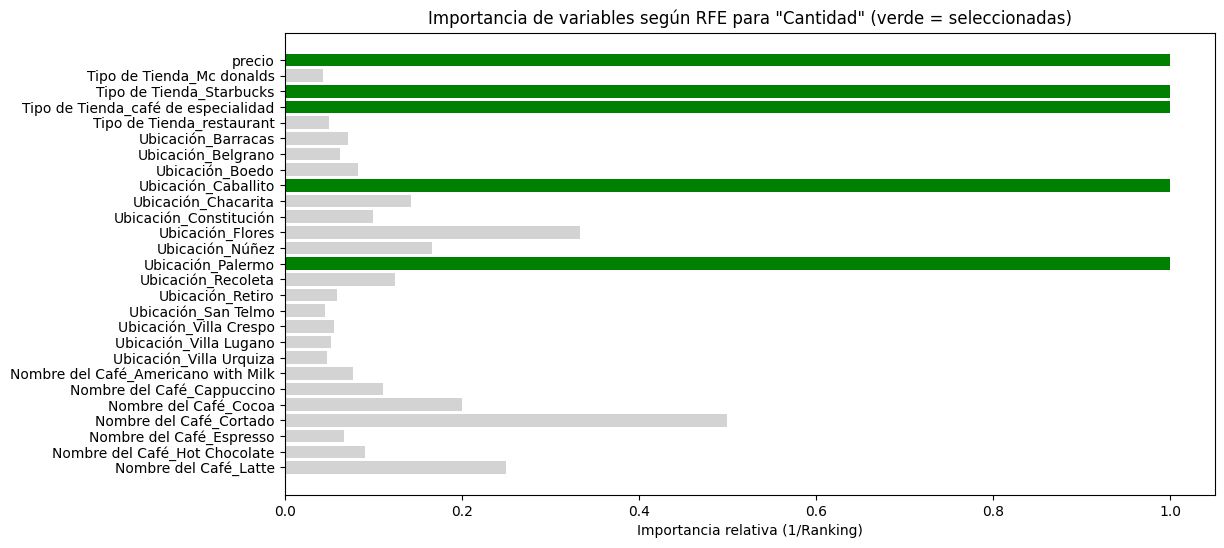

In [65]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# ---------------------------
# 1️⃣ Configuración
# ---------------------------
target = 'Cantidad'  # Variable a predecir (numérica o categórica)
task_type = 'regression'  # 'regression' o 'classification'
features = ['Tipo de Tienda', 'Ubicación', 'Nombre del Café', 'precio']  # Predictores
n_features_to_select = 5
numeric_cols = ['Cantidad', 'precio']  # para eliminar outliers si aplica

# ---------------------------
# 2️⃣ Eliminar outliers (solo para variables numéricas)
# ---------------------------
df_clean = df.copy()
if task_type == 'regression':
    for col in numeric_cols:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("✅ Dataset limpio de outliers. Nuevo tamaño:", df_clean.shape)

# ---------------------------
# 3️⃣ Preparar datos
# ---------------------------
X = df_clean[features].copy()
y = df_clean[target].copy()

# Convertir categóricas en variables numéricas
X = pd.get_dummies(X, drop_first=True)

# ---------------------------
# 4️⃣ Feature Selection con RFE
# ---------------------------
if task_type == 'regression':
    model_base = RandomForestRegressor(n_estimators=100, random_state=42)
else:
    model_base = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator=model_base, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

selected_columns = X.columns[rfe.support_]
print(f"\n✅ Variables seleccionadas con RFE para '{target}':")
print(selected_columns)

# ---------------------------
# 5️⃣ Separar train/test y entrenar modelo
# ---------------------------
X_selected = X[selected_columns]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model_base.fit(X_train, y_train)
y_pred = model_base.predict(X_test)

# ---------------------------
# 6️⃣ Métricas básicas
# ---------------------------
if task_type == 'regression':
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse) # Calculate RMSE manually
    r2 = r2_score(y_test, y_pred)
    print("\n📊 Métricas del modelo (Regresión):")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")
else:
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("\n📊 Métricas del modelo (Clasificación):")
    print(f"Accuracy: {acc:.2f}")
    print(report)

# ---------------------------
# 7️⃣ Gráfico de importancia
# ---------------------------
plt.figure(figsize=(12,6))
colors = ['green' if rfe.support_[i] else 'lightgray' for i in range(len(X.columns))]
plt.barh(X.columns, 1/rfe.ranking_, color=colors)
plt.xlabel('Importancia relativa (1/Ranking)')
plt.title(f'Importancia de variables según RFE para "{target}" (verde = seleccionadas)')
plt.gca().invert_yaxis()
plt.show()

# **Conclusiones** **Preliminares**

Los resultados obtenidos son:

1.   La bebida mas elegida en el analisis es el **Latte**
2.   La hora del dia de **mas** consumo es entre **las 10 y la 11 de la mañana** y la de **menor** compra las **6 de la mañana**
3.   El dia con **mayor** frecuencia es el **Martes** y el de **menos** los **Lunes**.
4.   El **medio de pago **, para las bebidas mas caras es **la tarjeta de credito** y para importe menores es la **billetera virtual**
5.   El precio **promedio** esta entre los **3000 y 4000**
6.   La **tienda mas elegida** son l**os cafes de especialidad** y la **menos** elegidas son los **restaurant**.
7.   Entre los valores atipicos podemos ver los kioscos con precios de 4000 por bebida y el medio de pago menos frecuentes en los kioscos es el de billeteras virtuales.
















# Sección nueva